# Microsoft Movie Analysis

_Author: Valentina Valdez_

![picture of motion picture camera](Images/pexels-donald-tong-66134.jpg)

## Business Understanding

### Company Vision and High Level Goals

Microsoft's decision to venture into the movie industry marks an exciting strategic shift. By telling compelling stories through film, Microsoft can connect with audiences on an emotional level and establish a stronger presence in popular culture, leading to increased brand awareness. 

Other tech companies such as Apple and Amazon have succesfully transitioned into the filmmaking industry. Microsft, by leveraging its extensive technological expertise, vast resources, and global reach, can produce high-quality movies that will enhance its brand image and increase its cultural influence. Within this analysis, I will explore how Microsoft should approach this new venture with the goal of **maximizing profitability** and **creating positive brand exposure**. 

The filmmaking industry is more than one hundred years old. However, this research will its analysis to films released between 2010 and 2019. This timeframe will ensure that the insights from this analysis reflect the current state of the filmmaking industry.

### Research Goals

Given the above goals, this research aims to answer the following questions:
- Does budget correlate to profits?
- Which directors are able to deliver high profits and ROI?
- Which directors are able to deliver critically accalimed films?
- Are there directors that can deliver both profitable and critically acclaimed films? 

Let's dive in!

## Data Understanding

This analysis uses a variety of trusted data sources. The datasets will be used to narrow down how Microsoft should  invest in its filmaking efforts. The sources are as follows:

- **IMDB:** Launched in 1990 - and owned by Amazon since 1998 - IMDB is one of the most popular and recognizable databases. This database houses a large amount of information such as directors, writers, genres, and release date.  
- **The Numbers:** This database was started in 1997, and is now the largest freely available database of movie business information. The available data contains information about movie titles, production budgets, and gross revenue data. 
- **The Academy Awards**: This data was created by scraping the <a href="https://awardsdatabase.oscars.org/">academy database</a> for a Kaggle competition. The Academy Awards is considered the most prestigious filmaking award in America, and this data will provide valuable insights in identifying individuals capable of making prestige films. This dataset contains information on Academy Award nominees and winners between the years 1927 and 2023. Access the data <a href="https://www.kaggle.com/datasets/unanimad/the-oscar-award">here</a> .  


This analysis is limited by the information in these datasets, and may not fully encompass the full scope of the filmaking industry. However, the data is current enough that this analysis can still provide valuable insight and guide Microsoft on their next steps.

## Exploratory Data Analysis

### Does budget correlate to profits?

First, lets visually examine the correlation between ROI and net profit.

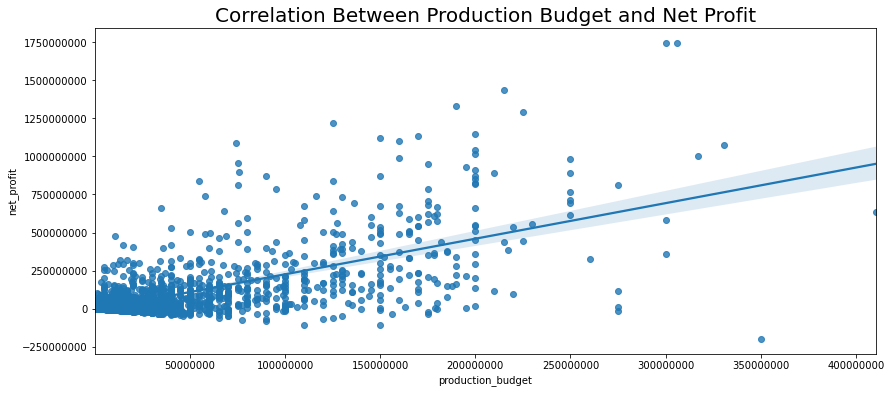

In [34]:
# Set the width and height
plt.figure(figsize=(14,6))

#Create plot
ax1 = sns.regplot(x=numbers_df['production_budget'],y=numbers_df['net_profit'])

#Create labels
ax1.ticklabel_format(style='plain')
plt.title('Correlation Between Production Budget and Net Profit', fontsize=20);

From the graph above, we can observe a modest positive correlation betweem budget and net profit. 

Breaking it down by budget level might bring insights into which budgets have high potential for commercial success - and profits.

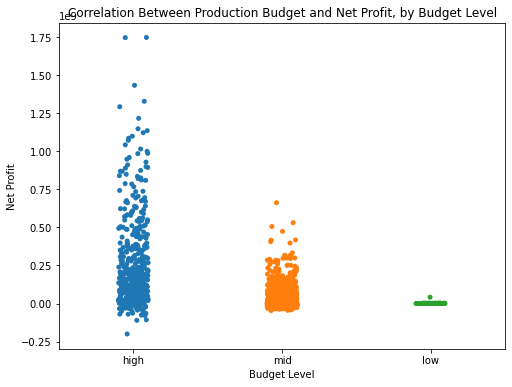

In [35]:
# Set the width and height
plt.figure(figsize=(8,6))

#Create plot
ax1 = sns.stripplot(x=numbers_df['budget_level'],y=numbers_df['net_profit'])

#Create labels
ax1.set_xlabel("Budget Level")
ax1.set_ylabel("Net Profit")
plt.title('Correlation Between Production Budget and Net Profit, by Budget Level');

''

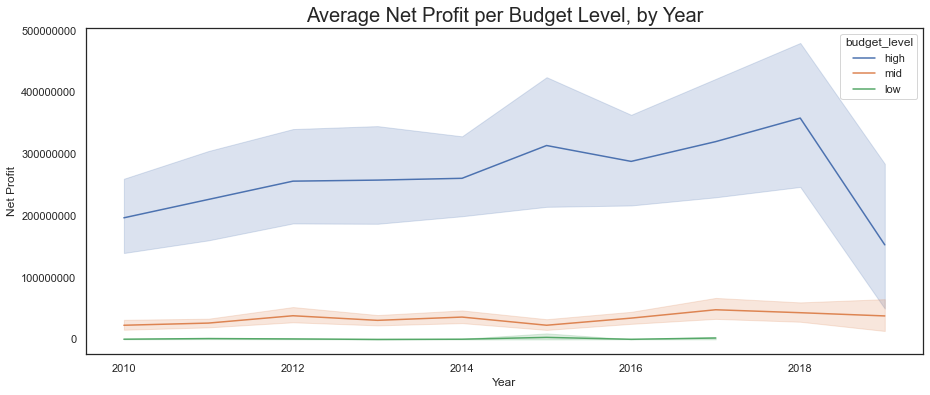

In [36]:
#Set figure size and style
sns.set(style="white")
plt.figure(figsize=(15, 6))

#Create plot
ax1 = sns.lineplot(data=numbers_df, x='release_year',y='net_profit', hue='budget_level', estimator='mean')

#Create labels
ax1.set_xlabel("Year")
ax1.set_ylabel("Net Profit")
ax1.ticklabel_format(style='plain')
plt.title('Average Net Profit per Budget Level, by Year', fontsize=20)

;

The visualitation *Average Net Profit per Budget Level, by Year* shows a significant dip in 2019. This is more than likely a result of the COVID-19 pandemic. 

While low budget movies can certainly be profitable, **mid (\\$5 to \\$50 million)** and **high (greater than \\$50 million)** budgets have a better chance of earning much higher profits. In addition to high, movies with higher profits tend to be much more culturally relevant.

## Which directors are able to deliver high profits and ROI?

Directors are the creative leads of the film. It is critical to select directors that know how to turn ideas into profitable products (aka films). Lets find current directors with the highest good success records in delivering profitable films. 

Moving forward in this analysis, I will remove low budget films since these films would not meet Microsoft's financial or cultural goals.

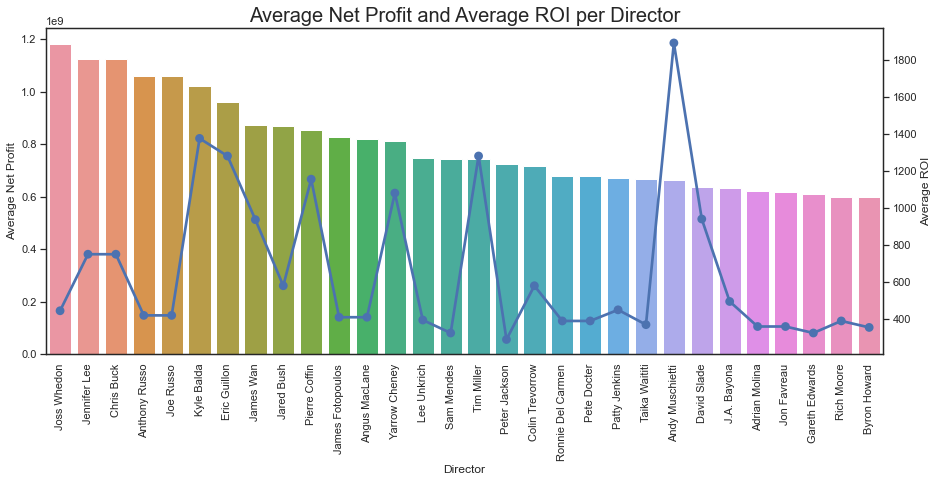

In [39]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_bdirectors['director'], y=top_bdirectors['net_profit'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_bdirectors['director'], y=top_bdirectors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Average Net Profit")
ax2.set_ylabel("Average ROI")
plt.title("Average Net Profit and Average ROI per Director", fontsize=20);


Great! We have a list of 30 directos that have a history of delivery profitable films. 

## Which directors are able to deliver critically accalimed films?

The idea here is very similar to the analysis above, but the analysis is now focused on which directors have worked on the most Oscar nominated films. I will use the merged dataset from earlier with the financial information. This merged dataset will be used once for the last question. 

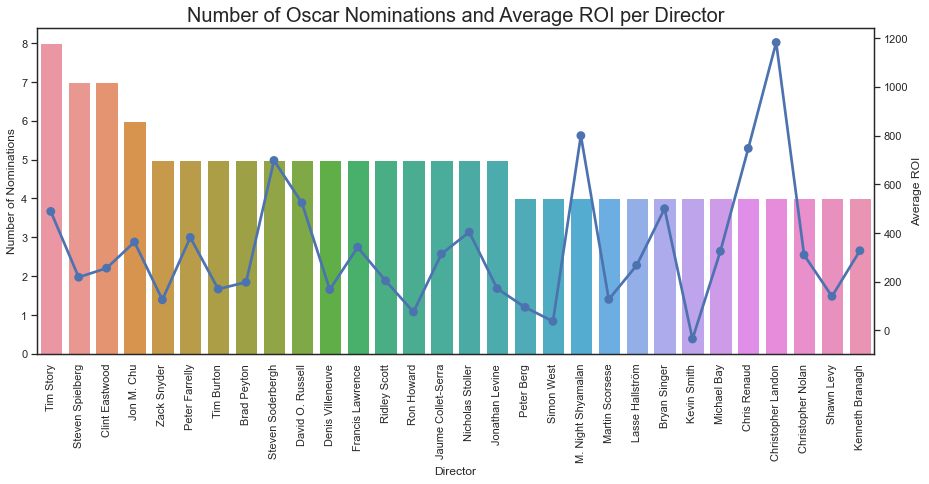

In [42]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_ndirectors['director'], y=top_ndirectors['nominated'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_ndirectors['director'], y=top_ndirectors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Number of Nominations")
ax2.set_ylabel("Average ROI")
plt.title("Number of Oscar Nominations and Average ROI per Director", fontsize=20);

I kept the ROI data to see if critically acclaimed also meant that no one saw it. Thankfully, that seems not to be the case. And now we have a list of directors that can deliver award winning films!

### Are there directors that can deliver both profitable and critically acclaimed films? 


Looking at our top 30 directors for awards and profit, there is no overlap. To answer this question, I will expand the top directors to 100 from each dataset to see if there is any overlap. 

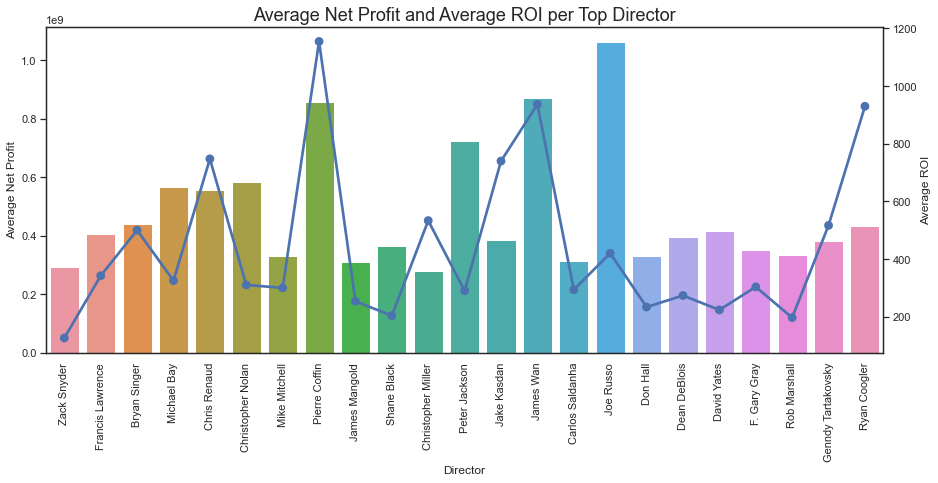

In [44]:
#Set figure size
sns.set(style="white")
plt.figure(figsize=(15, 6))

# Plot for net_profit on the left y-axis
ax1 = sns.barplot(x=top_directors['director'], y=top_directors['net_profit'])

# Plot for ROI on the right y-axis
ax2 = ax1.twinx()
sns.pointplot(x=top_directors['director'], y=top_directors['ROI'], label='Average ROI', ax=ax2)

#Create labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel("Director")
ax1.set_ylabel("Average Net Profit")
ax2.set_ylabel("Average ROI")
plt.title("Average Net Profit and Average ROI per Top Director", fontsize=18);

Out of 100 top directors for each category, there are **22 directors** that can do both!

## Recommendations

After this preliminary review, we recommend that Microsoft invests in the following strategies:

- **Invest in mostly high budget films**, with a mix of mid budget films. High budget films are more likely to be commercially succesful and also have a much larger cultural presence and resonance. 
- **Select directors with experience delivering high net gross or high critical acclaim experience**. To keep Microsoft's brand reputation, we need the best shot at success (either financially or culturally). 
- **If possible, hire directors that can do both**. There is no overlap in the top 30 directors of each category. Directors either excel at critical acclaim or financial success. However, it is possible to select directorial talent that can deliver excellent films that can do both. 

## Next Steps

The movie industry is large and complex, and this research only scratches the surface of the data Microsoft can use to make more informed decisions. My recommendations for next steps are as follows:
- **Investigate other filmmaking talent aside from directors.** There are writers, actors, producers, and composers that can help make or break a film. 
- **Research movie genres.** The types of films made also vary by trends. What are the emerging genres? Which ones are the most profitable? Which ones are more likely to be nominated for an Oscar? 
- **Look into the role of intellectial property as a success factor**. Big IPs like Marvel, DC, Nintendo, Legos, and Disney tend to hog the marker. It is possible that there are popular IPs that have yet to be adapted into film. 

## For More Information

Review the full analysis in the Jupyter notebook (link!) or this presentation (also link!).